In [36]:
import numpy as np
import matplotlib.pyplot as plt


## 모델에 사용될 이미지 전처리
- h5 모델제작할때와 같은 상황을 만들어야함.
- 이번 실습에서는 아래의 작업을 하기전에 숫자 3개를 나누어야함.

- h5 모델에 들어간 자료는(x자료는)

1. 사이즈는 28*28이다.
2. 그레이스케일이다.(차원은2차원이다.)
3. 배경이 어둡고 내용이 밝다.
4. 0~1사이 값이다.(/255하였다.)
5. 28*28을(1, 784)로 변경 하였다.

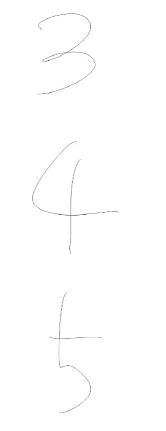

In [13]:
# 이미지 관련 모듈은 대표적으로 PIL과 openCV가 있음.
# openCV가 훨씬 다양함
# openCV는 욜로(객체검출)와 함께 다양하게 사용됨. 영사ㅏㅇ물에서의 이미지검출도 openCV

from PIL import Image
img=Image.open('number.png')
img

In [8]:
print(img.size)     # PIL은 너비와 높으로 표시됨(166, 431)

(166, 431)


In [11]:
np.shape(img)   # 한개자료만 읽었는데 1,2,3 까지 나오면 행,열,채널갯수 -> 채널갯수가 3은 컬러임

(431, 166, 3)

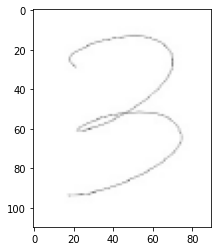

In [104]:
# img crop  'PILLOW에서 그림자르기'
# img.crop(시작하는왼쪽위치, 시작하는위쪽위치)
# img.crop(star Left, start Up, end Right, end Down)
img1=img.crop((20,0,110,110))
plt.imshow(np.array(img1))

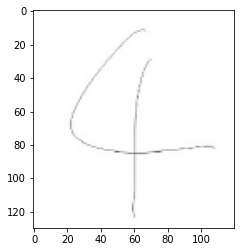

In [105]:
img2=img.crop((10,130,130,260))
plt.imshow(np.array(img2))

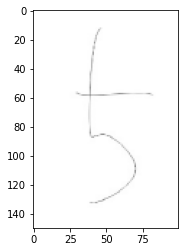

In [59]:
img3=img.crop((20,280,120,430))
plt.imshow(np.array(img3))

In [61]:
# 사이즈 변경
img_re1=img1.resize((28,28))    # 크기조절  # 열(폭,너비,가로)이미지, 행(높이,세로)이미지
img_re1

In [64]:
# 그레이스케일 변경
img_gr1=img_re1.convert('L')    # 그레이스케일로 변경
print(np.shape(img_gr1))   # 행, 열의 크기가 표시됨    # 그레이스케일 확인

img_gr1

(28, 28)


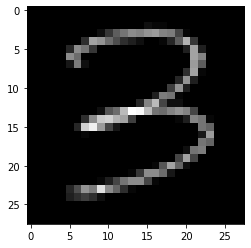

In [68]:
# 이미지 반전
# plt.imshow에 들어가는 자료는 반드시 색상숫자값이어야함. 이미지를 숫자로 변경하려면 array로 변경해야함.
import PIL.ImageOps
img_con_1=PIL.ImageOps.invert(img_gr1)    # 바탕(흰), 글씨(검정)색깔을 반전
plt.imshow(np.array(img_con_1), cmap='gray')
plt.show()

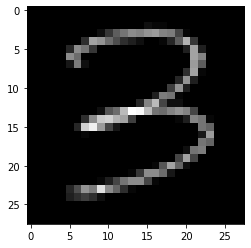

In [74]:
# 0~1 사이값이다.(모델링 작업에서한 스케일링과 똑같이 해야함)
img_sc_1=np.array(img_con_1)/255
plt.imshow(img_sc_1, cmap='gray')
# img_sc_1

In [77]:
# 28*28을 (1,784)로 변경
img_re_1=img_sc_1.reshape(1,-1)     # 1,784와 동일
img_re_1.shape

(1, 784)

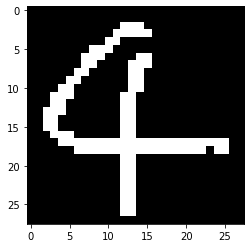

In [100]:
tmp2=img_re_2
for cnt in range(len(tmp2[0])):
    if tmp2[0][cnt]!=0.0:
        tmp2[0][cnt]=1.0

plt.imshow(tmp2.reshape(28,28),cmap='gray')

## 숫자인식하는 h5모델을 불러오고 그 모델에 img_re_1을 넣어서 예측을 해보려함

In [81]:
import tensorflow as tf
load_model=tf.keras.models.load_model('my_mnist.h5')
load_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [84]:
# 모델 작성할때 최종 레이어의 Dense의 유닛갯수가 10개(y_train값의 unique갯수와 같음) 여기서 그 10개에 각각의 비중이 출력됨
result=load_model.predict(img_re_1)     
result

array([[2.0282032e-21, 9.5203367e-21, 1.4190285e-10, 1.0000000e+00,
        1.0322439e-29, 2.3674445e-18, 8.7391575e-27, 2.2127064e-22,
        2.8623279e-16, 1.3070163e-28]], dtype=float32)

In [93]:
print(np.argmax(result))    # 인식한 숫자

3


5


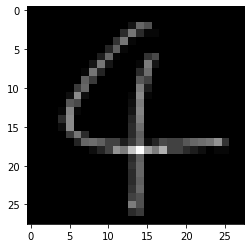

In [106]:
img_re2=img2.resize((28,28))
img_gr2=img_re2.convert('L')
img_con_2=PIL.ImageOps.invert(img_gr2)
plt.imshow(np.array(img_con_2), cmap='gray')
img_sc_2=np.array(img_con_2)/255
plt.imshow(img_sc_2, cmap='gray')
img_re_2=img_sc_2.reshape(1,-1)
result1=load_model.predict(img_re_2)     
result1
print(np.argmax(result2))

5


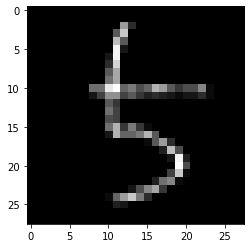

In [95]:
img_re3=img3.resize((28,28))
img_gr3=img_re3.convert('L')
img_con_3=PIL.ImageOps.invert(img_gr3)
plt.imshow(np.array(img_con_3), cmap='gray')
img_sc_3=np.array(img_con_3)/255
plt.imshow(img_sc_3, cmap='gray')
img_re_3=img_sc_3.reshape(1,-1)
result2=load_model.predict(img_re_3)     
result2
print(np.argmax(result2))